**Gradient Decent**

**Data Reading and Preparing**

In [23]:
#Read data
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data = np.loadtxt('regression_x_t.txt')
m = len(data)
x = data[:,0]
x0 = np.full(m, 1.0) 
x2 = np.power(x,2)
x3 = np.power(x,3) 
X = np.vstack([x0,x,x2,x3]).T    
Y = data[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)
m_train = len(X_train)
m_test = len(X_test)
# print("X is", X.shape)
# print("m is", m_train)
# print("X_train is", X_train.shape)
# print(Y.shape)


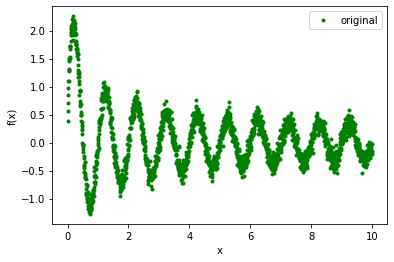

In [24]:
# Plot all the original data to see the distribution
import matplotlib.pyplot as plt
plt.plot(X.T[1],Y, "g.",label="original")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

**Batch Gradient Descent (Polynomial Linear Regression)**
1st order polynomial regression w_BGD_P1

In [27]:
#a) decressing of error function within increasing of interation 
#b) result coefficient w
#parameter
max_iter = 10000  #  The maximum number of iterations
w_BGD_P1 = np.random.randn(2) # initial the w
epsilon = 0.00001
step = 0.00001
count = 0
pre_w_BGD_P1 = np.zeros(2) 
X_train_1 = X_train[:,:2]
#iteration
while count < max_iter:
    count += 1
    sum_m = np.zeros(2)
    for i in range(m_train):  # sum gradient of every w
        diff = (np.dot(w_BGD_P1, X_train_1[i]) - Y_train[i]) * X_train_1[i]
        sum_m = sum_m + diff    
    w_BGD_P1 = w_BGD_P1 - step * sum_m
    if ((np.linalg.norm(w_BGD_P1 - pre_w_BGD_P1)) < epsilon):
        break
    else:
        rmseEachround = mean_squared_error(np.dot(X_test[:,:2],w_BGD_P1),Y_test,squared=False)
        if (count % 100 == 0):
            print("interation count = %d"%count, "error = %f" %(np.linalg.norm(w_BGD_P1 - pre_w_BGD_P1)))
        pre_w_BGD_P1 = w_BGD_P1
print ('Total iteration = %d' % count,  '\tFinal w:[%f, %f]' % (w_BGD_P1[0], w_BGD_P1[1]))



interation count = 100 error = 0.000480
interation count = 200 error = 0.000322
interation count = 300 error = 0.000216
interation count = 400 error = 0.000145
interation count = 500 error = 0.000097
interation count = 600 error = 0.000065
interation count = 700 error = 0.000044
interation count = 800 error = 0.000029
interation count = 900 error = 0.000020
interation count = 1000 error = 0.000013
Total iteration = 1068 	Final w:[0.217591, -0.033944]


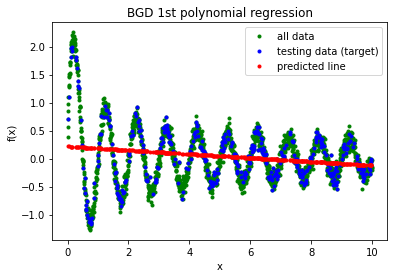

In [28]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
import matplotlib.pyplot as plt
Y_predict = np.dot(X_test[:,:2],w_BGD_P1)
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r.", label = "predicted line")
plt.title("BGD 1st polynomial regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [29]:
#d)Root-Mean-Square Error of 1st Polynomial function 
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, Y_predict,squared=False)
print (rmse)

0.4761246265124278


**Batch Gradient Descent (3rd order Polynomial Regression)**
3rd order polynomial regression w_BGD_P1

Result: If we initial the w2 and w3 as 0, the regression will end in 3 iterations, which means the optimal solution of 1st order polynomial regression is still the global optimal of 3rd order polynomial regression. If we initial some random w, the gradient descent will end up at a local optimal that has a larger RMSE.

In [30]:
#a) decressing of error function within increasing of interation 
#b) result coefficient w
#parameter
max_iter = 100000  #  The maximum number of iterations
w_BGD_P3 = [0.217590, -0.033943, 0, 0]   # initial the w   
epsilon = 0.00001
step = 0.000000001
count = 0
pre_w_BGD_P3 = np.zeros(4) 
#iteration
while count < max_iter:
    count += 1
    sum_m = np.zeros(4)
    for i in range(m_train):  # sum gradient of every w
        diff = (np.dot(w_BGD_P3, X_train[i]) - Y_train[i]) * X_train[i]
        sum_m = sum_m + diff    
    w_BGD_P3 = w_BGD_P3 - step * sum_m
    if ((np.linalg.norm(w_BGD_P3 - pre_w_BGD_P3)) < epsilon):
        break
    else:
         rmseEachround = mean_squared_error(np.dot(X_test,w_BGD_P3),Y_test,squared=False)
         print("interation count = %d"%count, "error = %f" %(np.linalg.norm(w_BGD_P3 - pre_w_BGD_P3)), "rmse = %f" %rmseEachround)
         pre_w_BGD_P3 = w_BGD_P3
print ('Total iteration = %d' % count,  '\tFinal w:[%f, %f, %f, %f]' % (w_BGD_P3[0], w_BGD_P3[1], w_BGD_P3[2], w_BGD_P3[3]))


interation count = 1 error = 0.220222 rmse = 0.475935
interation count = 2 error = 0.000012 rmse = 0.475845
Total iteration = 3 	Final w:[0.217590, -0.033943, 0.000003, 0.000037]


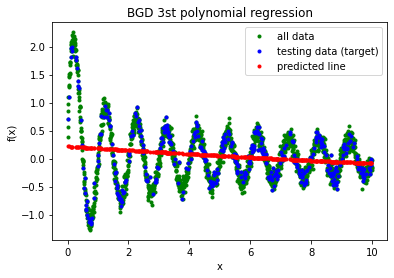

In [31]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
import matplotlib.pyplot as plt
Y_predict = np.dot(X_test,w_BGD_P3)
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r.", label = "predicted line")
plt.title("BGD 3st polynomial regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [32]:
#d)Root-Mean-Square Error of 3st Polynomial function 
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, Y_predict,squared=False)
print (rmse)

0.4758103218871215


**Stochastic Gradient Descent (Linear Regression)**
1st order polynomial regression w_SGD_P1

In [33]:
#a) decressing of error function within increasing of used data points
#b) result coefficient w
max_iter = 100000  #  The maximum number of iterations
w_SGD_P1 = np.random.randn(2) # initial the w
epsilon = 0.00001
step = 0.00001
count = 0
pre_w_SGD_P1 = np.zeros(2) 
rmseTotal = 0.0

#iteration
while count < max_iter:
    count += 1
    randomNum = np.random.randint(low = 0, high = m_train, size = None, dtype='l')
    diff = (np.dot(w_SGD_P1, X_train_1[randomNum]) - Y_train[randomNum]) * X_train_1[randomNum]   
    w_SGD_P1 = w_SGD_P1 - step * diff * m_train
    if np.linalg.norm(w_SGD_P1 - pre_w_SGD_P1) < epsilon:
        break
    else:
        rmseEachround = mean_squared_error(np.dot(X_test[:,:2],w_SGD_P1),Y_test,squared=False)
        rmseTotal += rmseEachround
        if(count%100 == 0):
            print("interation count = %d"%count, "rmse = %f" %(rmseTotal/100))
            rmseTotal = 0
        pre_w_SGD_P1 = w_SGD_P1
print ('Total iteration = %d' % count,  '\tFinal w:[%f, %f]' % (w_SGD_P1[0], w_SGD_P1[1]))


interation count = 100 rmse = 0.656014
interation count = 200 rmse = 0.579117
interation count = 300 rmse = 0.558527
interation count = 400 rmse = 0.530442
interation count = 500 rmse = 0.512621
interation count = 600 rmse = 0.512177
interation count = 700 rmse = 0.545196
interation count = 800 rmse = 0.529054
interation count = 900 rmse = 0.530989
interation count = 1000 rmse = 0.522358
interation count = 1100 rmse = 0.517325
interation count = 1200 rmse = 0.524225
interation count = 1300 rmse = 0.523468
interation count = 1400 rmse = 0.533087
interation count = 1500 rmse = 0.521282
interation count = 1600 rmse = 0.516972
interation count = 1700 rmse = 0.523514
interation count = 1800 rmse = 0.530796
interation count = 1900 rmse = 0.527007
interation count = 2000 rmse = 0.565166
interation count = 2100 rmse = 0.543610
interation count = 2200 rmse = 0.531301
interation count = 2300 rmse = 0.521784
interation count = 2400 rmse = 0.529875
interation count = 2500 rmse = 0.520183
interatio

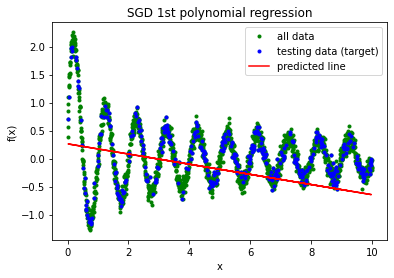

In [34]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
Y_predict = np.dot(X_test[:,:2],w_SGD_P1)
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r", label = "predicted line")
plt.title("SGD 1st polynomial regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [35]:
#d)Root-Mean-Square Error of 1st Polynomial function 
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, Y_predict,squared=False)
print (rmse)

0.5707728491775556


**Stochastic Gradient Descent (Linear Regression)**
3rd order polynomial regression w_SGD_P3

In [36]:
#a) decressing of error function within increasing of used data points
#b) result coefficient w
max_iter = 100000  #  The maximum number of iterations
w_SGD_P3 = [0.12, -0.11, 0, 0] # initial the w
epsilon = 0.00001
step = 0.000000001
count = 0
pre_w_SGD_P3 = np.zeros(4) 
errorNorm = 0.0

#iteration
while count < max_iter:
    count += 1
    randomNum = np.random.randint(low = 0, high = m_train, size = None, dtype='l')
    diff = (np.dot(w_SGD_P3, X_train[randomNum]) - Y_train[randomNum]) * X_train[randomNum]   
    w_SGD_P3 = w_SGD_P3 - step * diff * m_train
    if np.linalg.norm(w_SGD_P3 - pre_w_SGD_P3) < epsilon:
        break
    else:
        rmseEachround = mean_squared_error(np.dot(X_test,w_SGD_P3),Y_test,squared=False)
        print("interation count = %d"%count, "rmse = %f" %rmseEachround, )
        pre_w_SGD_P3 = w_SGD_P3
print ('Total iteration = %d' % count,  '\tFinal w:[%f, %f, %f, %f]' % (w_SGD_P3[0], w_SGD_P3[1],w_SGD_P3[2], w_SGD_P3[3]))

interation count = 1 rmse = 0.729399
interation count = 2 rmse = 0.724363
interation count = 3 rmse = 0.694380
interation count = 4 rmse = 0.622880
interation count = 5 rmse = 0.608848
interation count = 6 rmse = 0.538171
Total iteration = 7 	Final w:[0.120004, -0.109978, 0.000134, 0.000948]


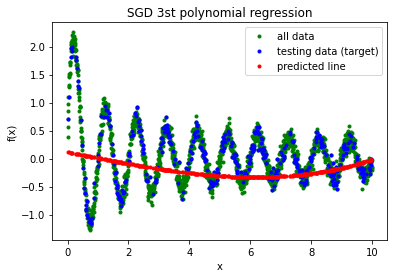

In [37]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
Y_predict = np.dot(X_test,w_SGD_P3)
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r.", label = "predicted line")
plt.title("SGD 3st polynomial regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [38]:
#d)Root-Mean-Square Error of 1st Polynomial function 
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, Y_predict,squared=False)
print (rmse)

0.5382133173358129


**Maximum Likehood Algorithm**
${W^* = (X^T X)^(-1)X^T Y}$

**1st polynomial regression**

In [41]:
xMaL_1 = np.mat(X_train[:,:2])
yMaL_1 = np.mat(Y_train).T
xTx_1 = xMaL_1.T * xMaL_1
w_Max_1 = xTx_1.I * xMaL_1.T * yMaL_1
print('Final w is [%f,%f]'%(w_Max_1[0],w_Max_1[1]))

Final w is [0.220049,-0.034318]


BGD [0.217591, -0.033944]
SGD [0.263690, -0.090893]

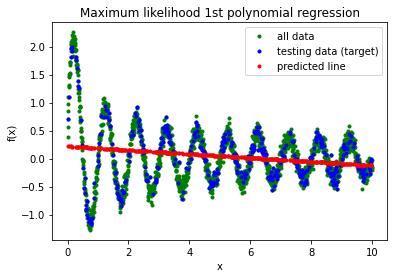

In [42]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
Y_predict = np.dot(X_test[:,:2],w_Max_1)
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r.", label = "predicted line")
plt.title("Maximum likelihood 1st polynomial regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [43]:
#d)Root-Mean-Square Error of 1st Polynomial function 
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, np.squeeze(np.array(Y_predict.T)),squared=False)
print (rmse)

0.47619099631008505


BGD 0.4761246265124278
SGD 0.5707728491775556

**3rd polynomial regression**

In [44]:
xMaL = np.mat(X_train)
yMaL = np.mat(Y_train).T
xTx = xMaL.T * xMaL
w_Max = xTx.I * xMaL.T * yMaL
print('Final w is [%f,%f,%f,%f]'%(w_Max[0],w_Max[1],w_Max[2],w_Max[3]))

Final w is [0.838005,-0.632842,0.127952,-0.007558]


BGD [0.217590, -0.033943, 0.000003, 0.000037]
SGD [0.120004, -0.109978, 0.000134, 0.000948]

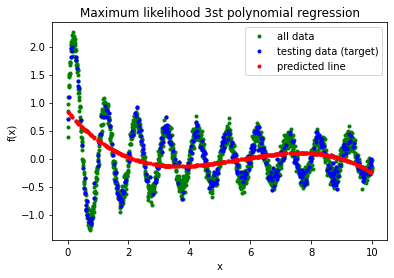

In [45]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
Y_predict = np.dot(X_test,w_Max)
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r.", label = "predicted line")
plt.title("Maximum likelihood 3st polynomial regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [43]:
#d)Root-Mean-Square Error of 3rd Polynomial function 
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, np.squeeze(np.array(Y_predict.T)),squared=False)
print (rmse)

0.48303218888809946


BGD 0.4758103218871215
SGD 0.5382133173358129

**Gaussion Basis**

In [46]:
def gaussian_basis(x, mu, gamma=1):
    return np.exp(-gamma * np.linalg.norm(mu-x)**2)

M = 9
# Calculate design matrix Phi
Phi = np.ones((Y_train.shape[0], M))
for m in range(M-1):
    mu = m/M
    Phi[:, m+1] = np.vectorize(gaussian_basis)(X_train[:,1], mu)

# Calculate parameters w and alpha
w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ Y_train
alpha = sum((Y_train - Phi @ w)**2) / len(Y_train)


In [47]:
#d)Root-Mean-Square Error 
from sklearn.metrics import mean_squared_error

Phi_t = np.ones((Y_test.shape[0], M))
for m in range(M-1):
    mu = m/M
    Phi_t[:, m+1] = np.vectorize(gaussian_basis)(X_test[:,1], mu)


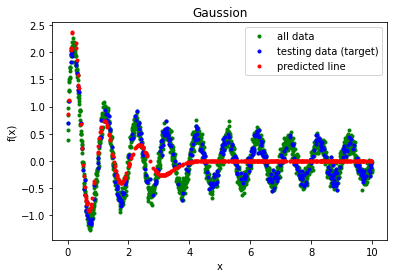

In [48]:
#c)Plot the predicted f(x) on testing data x within the actual target t on the same figure
Y_predict = Phi_t @ w
l_all = plt.plot(X.T[1],Y,"g.",label ="all data")
l_test = plt.plot(X_test.T[1],Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test.T[1],Y_predict,"r.", label = "predicted line")
plt.title("Gaussion")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [49]:
#root mean sqare error
rmse = mean_squared_error(Y_test, Phi_t @ w,squared=False)
print (rmse)

0.31892692192011113
